<a href="https://colab.research.google.com/github/SeffySnow/Person-job-fit/blob/main/Direct_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource

In [ ]:
!pip install kaggle



In [ ]:
!kaggle datasets download -d ayushtankha/70k-job-applicants-data-human-resource



Dataset URL: https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource
License(s): unknown
  0% 0.00/2.02M [00:00<?, ?B/s]
100% 2.02M/2.02M [00:00<00:00, 59.3MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('70k-job-applicants-data-human-resource.zip', 'r') as zip_ref:
    zip_ref.extractall('70k-job-applicants-data-human-resource')


In [ ]:
import pandas as pd

df = pd.read_csv('/content/70k-job-applicants-data-human-resource/stackoverflow_full.csv', index_col=0)

In [ ]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [ ]:
# Data Cleaning

# Drop the 'Unnamed: 0' column as it is an index


# Handle missing values
df['HaveWorkedWith'].fillna('Unknown', inplace=True)

# Replace 'Yes' with 1 and 'No' with 0
df_cleaned = df.replace({'Yes': 1, 'No': 0})

# Feature Selection
# We will use 'Age', 'EdLevel', 'Gender', 'YearsCode', 'YearsCodePro', 'Country', 'PreviousSalary', and 'ComputerSkills' for clustering

# # Encoding categorical variables
# df_encoded = pd.get_dummies(df_cleaned, columns=['Age', 'EdLevel', 'Gender', 'Country'], drop_first=True)

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# df_normalized = df_encoded.copy()
# df_cleaned[['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']] = scaler.fit_transform(df_cleaned[['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']])

# # Display the first few rows of the cleaned, encoded, and normalized dataset
# df_cleaned.head()



#visualiztion

NameError: name 'df' is not defined

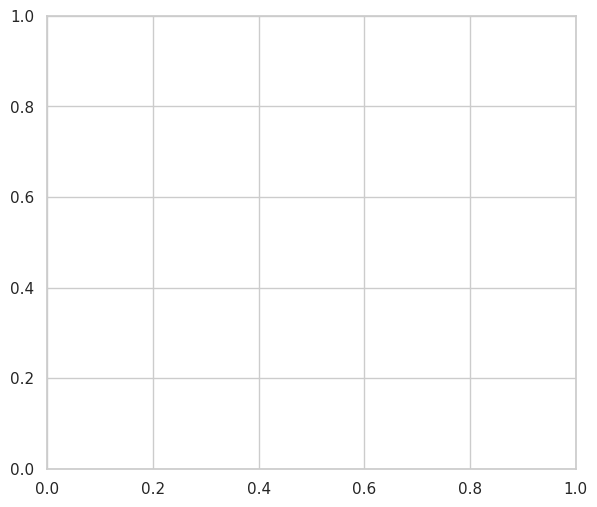

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Figure size
plt.figure(figsize=(15, 20))

# Subplot for Age distribution
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='Age', order=df['Age'].value_counts().index)
plt.title('Age Distribution')

# Subplot for Accessibility
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='Accessibility', order=df['Accessibility'].value_counts().index)
plt.title('Accessibility Status')

# Subplot for Education Level (EdLevel)
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='EdLevel', order=df['EdLevel'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Education Level Distribution')

# Subplot for Gender distribution
plt.subplot(3, 2, 4)
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title('Gender Distribution')

# Subplot for MainBranch
plt.subplot(3, 2, 5)
sns.countplot(data=df, x='MainBranch', order=df['MainBranch'].value_counts().index)
plt.title('Main Professional Branch')

# Subplot for HaveWorkedWith (Top 10)
plt.subplot(3, 2, 6)
# Split 'HaveWorkedWith' and count occurrences of each technology
tech_series = df['HaveWorkedWith'].str.split(';', expand=True).stack()
tech_count = tech_series.value_counts().head(10)
sns.barplot(x=tech_count.index, y=tech_count.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Technologies Worked With')

plt.figure(figsize=(15, 6))
country_count = df['Country'].value_counts().head(10)  # Show top 10 countries
sns.barplot(x=country_count.index, y=country_count.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Candidates')
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()


Declaring a job position and filter the dataset:

*   age < 35
*   Dev - front end developer
*   Skills: JavaScript, Docker, HTML/CSS, TypeScript





# Filtering data

In [ ]:
# Define the criteria for the job position
age_criteria = df['Age'] == '<35'
main_branch_criteria = df['MainBranch'] == 'Dev'
country_criteria = df['Country'] == 'United States of America'
skills_criteria = df['HaveWorkedWith'].apply(lambda x: all(skill in str(x) for skill in ['JavaScript', 'Docker', 'HTML/CSS', 'TypeScript']))

# Filter the data based on the criteria
filtered_df = df[age_criteria & main_branch_criteria & country_criteria & skills_criteria]

# Display the filtered data
# filtered_df.head(),
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, 201 to 73396
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1475 non-null   object 
 1   Accessibility   1475 non-null   object 
 2   EdLevel         1475 non-null   object 
 3   Employment      1475 non-null   int64  
 4   Gender          1475 non-null   object 
 5   MentalHealth    1475 non-null   object 
 6   MainBranch      1475 non-null   object 
 7   YearsCode       1475 non-null   int64  
 8   YearsCodePro    1475 non-null   int64  
 9   Country         1475 non-null   object 
 10  PreviousSalary  1475 non-null   float64
 11  HaveWorkedWith  1475 non-null   object 
 12  ComputerSkills  1475 non-null   int64  
 13  Employed        1475 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 172.9+ KB


In [ ]:
filtered_df=filtered_df.drop(["Age", "MainBranch","Country"], axis=1)

# Prepare Data

In [ ]:
filtered_df.head()

,Accessibility,EdLevel,Employment,Gender,MentalHealth,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
201,No,Undergraduate,1,Man,No,12,3,67000.0,C#;Dart;Delphi;HTML/CSS;Java;JavaScript;Kotlin...,28,1
217,No,Undergraduate,1,Man,No,10,6,170000.0,C#;HTML/CSS;Java;JavaScript;PowerShell;SQL;Typ...,24,1
224,No,NoHigherEd,1,Man,No,8,2,40000.0,HTML/CSS;JavaScript;Node.js;TypeScript;Docker;...,9,0
290,No,Other,0,Man,No,8,5,72000.0,C#;HTML/CSS;JavaScript;Node.js;PHP;TypeScript;...,12,1
315,No,Undergraduate,1,Man,No,15,9,135000.0,Bash/Shell;Go;HTML/CSS;Java;JavaScript;Objecti...,14,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
cat = [ 'EdLevel', 'Gender', 'MentalHealth','Accessibility', 'Employment']
num = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']
y= filtered_df['Employed']
X = filtered_df.drop(['Employed'], axis=1)
onehot = OneHotEncoder()
scaler = MinMaxScaler()
tranformer = ColumnTransformer([
    ('onehot', onehot, cat),
    ('scaler', scaler, num)
], remainder = 'passthrough')
data = tranformer.fit_transform(X)
cat_columns = tranformer.named_transformers_['onehot'].get_feature_names_out(cat)
num_columns = num  # Since scaler doesn't change column names
new_column_names = list(cat_columns) + list(num_columns) + ['Skills']
data.shape
# Convert the transformed data back to a DataFrame with new column names
transformed_df = pd.DataFrame(data, columns=new_column_names)

In [ ]:
y= filtered_df['Employed']

In [ ]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.4,0.166667,0.299962,0.354839,C#;Dart;Delphi;HTML/CSS;Java;JavaScript;Kotlin...
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.333333,0.333333,0.762167,0.290323,C#;HTML/CSS;Java;JavaScript;PowerShell;SQL;Typ...
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.266667,0.111111,0.178801,0.048387,HTML/CSS;JavaScript;Node.js;TypeScript;Docker;...
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.266667,0.277778,0.322399,0.096774,C#;HTML/CSS;JavaScript;Node.js;PHP;TypeScript;...
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.5,0.5,0.605107,0.129032,Bash/Shell;Go;HTML/CSS;Java;JavaScript;Objecti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.5,0.444444,0.641006,0.209677,Bash/Shell;Elixir;Erlang;HTML/CSS;JavaScript;L...
1471,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.277778,0.448047,0.322581,HTML/CSS;Java;JavaScript;MATLAB;Objective-C;PH...
1472,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.5,0.555556,0.40766,0.290323,Bash/Shell;C#;C++;HTML/CSS;JavaScript;MATLAB;P...
1473,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.233333,0.111111,0.40766,0.258065,Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;Pyt...


In [ ]:

transformed_df.iloc[0]
# transformed_df.drop(['Skills'], axis=1, inplace=True)

,0
EdLevel_Master,0.0
EdLevel_NoHigherEd,0.0
EdLevel_Other,0.0
EdLevel_PhD,0.0
EdLevel_Undergraduate,1.0
Gender_Man,1.0
Gender_NonBinary,0.0
Gender_Woman,0.0
MentalHealth_No,1.0
MentalHealth_Yes,0.0


In [ ]:
l=[]
for person in transformed_df['Skills']:

  all = person.split(";")
  for skill in all:

    if skill not in l:
      l.append(skill)


In [ ]:
skills_set= set(l)

In [ ]:
for skill in skills_set:
    transformed_df[f'Skill_{skill}'] = transformed_df['Skills'].apply(lambda x: 1 if skill in x else 0)



<ipython-input-11-53e844543e6f>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[f'Skill_{skill}'] = transformed_df['Skills'].apply(lambda x: 1 if skill in x else 0)
<ipython-input-11-53e844543e6f>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[f'Skill_{skill}'] = transformed_df['Skills'].apply(lambda x: 1 if skill in x else 0)
<ipython-input-11-53e844543e6f>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

In [ ]:
transformed_df

,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,MentalHealth_No,MentalHealth_Yes,...,Skill_C#,Skill_Assembly,Skill_Microsoft Azure,Skill_Homebrew,Skill_CouchDB,Skill_Fortran,Skill_Perl,Skill_Lua,Skill_Git,Skill_Bash/Shell
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,0,0,0,0,1,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,1
1471,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1472,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,0,0,1
1473,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
transformed_df.drop(['Skills'], axis=1, inplace=True)

In [ ]:
df.shape

(1475, 134)

In [ ]:
transformed_df['Skill_CouchDB']

# Cosine SImilarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(transformed_df)

In [ ]:
threshold = 0.7
edges = []
for i in range(similarity_matrix.shape[0]):
    for j in range(i+1, similarity_matrix.shape[1]):
        if similarity_matrix[i, j] > threshold:
            edges.append((i, j))


# Convert to edge_index for PyTorch Geometric
edge_index = np.array(edges).T


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00


In [ ]:
transformed_df = transformed_df.astype(np.float32)
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Columns: 134 entries, EdLevel_Master to Skill_IBM Cloud or Watson
dtypes: float32(134)
memory usage: 772.2 KB


In [ ]:
import torch
from torch_geometric.data import Data

# Prepare node features (excluding the target column if any)

node_features = torch.tensor(transformed_df.values, dtype=torch.float)
y = torch.tensor(y.values, dtype=torch.long)


# Convert edges to PyTorch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long)

# Create PyTorch Geometric data object



In [ ]:
data = Data(x=node_features, edge_index=edge_index, y=y)

In [ ]:
data.y.shape

torch.Size([1475])

In [ ]:
data.test_mask

tensor([True, True, True,  ..., True, True, True])

In [ ]:
num_nodes = len(data.y)
num_train = int(num_nodes * 0.8)

# Create train and test masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Randomly assign nodes to training and testing sets without overlap
perm = torch.randperm(num_nodes)
train_mask[perm[:num_train]] = True
test_mask[perm[num_train:]] = True

# Ensure no overlap
assert not torch.any(train_mask & test_mask), "Train and test masks overlap"

data.train_mask = train_mask
data.test_mask = test_mask

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# Define the GCN model with binary output
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, 1)  # Binary output

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv3(x, edge_index)
        return x.view(-1)  # Flatten the output

# Instantiate the GCN model
model = GCN(num_node_features=data.num_node_features, hidden_channels=32)

# Define optimizer and loss function for GCN
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss_fn = torch.nn.BCEWithLogitsLoss()

# Training function for GCN
def train_gcn():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = loss_fn(out[data.train_mask], data.y[data.train_mask].float())
    loss.backward()
    optimizer.step()
    return loss.item()

# Train the GCN model
for epoch in range(500):
    loss = train_gcn()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, GCN Loss: {loss:.4f}')

# Convert PyTorch tensor data to NumPy for the Decision Tree



Epoch 0, GCN Loss: 1.0375
Epoch 10, GCN Loss: 0.3907
Epoch 20, GCN Loss: 0.3901
Epoch 30, GCN Loss: 0.3777
Epoch 40, GCN Loss: 0.3426
Epoch 50, GCN Loss: 0.3615
Epoch 60, GCN Loss: 0.4037
Epoch 70, GCN Loss: 0.3363
Epoch 80, GCN Loss: 0.3337
Epoch 90, GCN Loss: 0.3562
Epoch 100, GCN Loss: 0.3341
Epoch 110, GCN Loss: 0.3286
Epoch 120, GCN Loss: 0.3245
Epoch 130, GCN Loss: 0.3144
Epoch 140, GCN Loss: 0.3142
Epoch 150, GCN Loss: 0.2986
Epoch 160, GCN Loss: 0.3183
Epoch 170, GCN Loss: 0.3224
Epoch 180, GCN Loss: 0.2929
Epoch 190, GCN Loss: 0.2898
Epoch 200, GCN Loss: 0.3146
Epoch 210, GCN Loss: 0.2905
Epoch 220, GCN Loss: 0.2935
Epoch 230, GCN Loss: 0.3148
Epoch 240, GCN Loss: 0.2846
Epoch 250, GCN Loss: 0.2943
Epoch 260, GCN Loss: 0.2828
Epoch 270, GCN Loss: 0.2994
Epoch 280, GCN Loss: 0.2821
Epoch 290, GCN Loss: 0.2690
Epoch 300, GCN Loss: 0.2855
Epoch 310, GCN Loss: 0.2774
Epoch 320, GCN Loss: 0.2767
Epoch 330, GCN Loss: 0.2755
Epoch 340, GCN Loss: 0.2768
Epoch 350, GCN Loss: 0.2760
Epo

In [ ]:
def test():
    model.eval()
    with torch.no_grad():
        out =model(data)
    pred = torch.sigmoid(out) > 0.5
    pred = pred[data.test_mask].cpu().numpy()
    print(pred)
    true = data.y[data.test_mask].cpu().numpy()
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)
    return precision, recall, f1

# Evaluate the model
precision, recall, f1 = test()
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


[ True  True  True ...  True  True  True]
Precision: 0.8918
Recall: 0.9916
F1 Score: 0.9390


#Lastly

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.spatial.distance import pdist, squareform

# Assume x_train, y_train, x_test, y_test are already defined

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=12, min_samples_split=10)

# Train the SVM Classifier
svm_model = SVC(kernel='poly', degree=6, probability=True, random_state=42)

# Combine the classifiers using a voting classifier
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('dt', dt_model),
    ('svm', svm_model)
], voting='soft')

# Train the voting classifier
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)

# Evaluate the Voting Classifier
voting_precision = precision_score(y_test, voting_pred)
voting_recall = recall_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)

print(f'Voting Classifier Precision: {voting_precision:.4f}')
print(f'Voting Classifier Recall: {voting_recall:.4f}')
print(f'Voting Classifier F1 Score: {voting_f1:.4f}')


Voting Classifier Precision: 0.9600
Voting Classifier Recall: 0.9888
Voting Classifier F1 Score: 0.9742


In [ ]:
(voting_pred==1)

True

In [ ]:
import torch

if isinstance(y_test, torch.Tensor):
    y_test = y_test.numpy()
selected_indices = np.where((voting_pred== 1))
selected_nodes = X_test.iloc[selected_indices]



In [ ]:
selected_nodes

,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,MentalHealth_No,MentalHealth_Yes,...,Skill_C#,Skill_Assembly,Skill_Microsoft Azure,Skill_Homebrew,Skill_CouchDB,Skill_Fortran,Skill_Perl,Skill_Lua,Skill_Git,Skill_Bash/Shell
852,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
184,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,0,1,0
1225,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,0,0,1
67,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
220,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
567,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
946,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
874,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler

selected_nodes_array = selected_nodes.select_dtypes(include=np.number).to_numpy()

# Calculate the Euclidean distance for selected nodes
euclidean_distances = squareform(pdist(selected_nodes_array, metric='euclidean'))

# Initialize the Isolation Forest model for Euclidean distances
iso_forest_euclidean = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination level as needed

# Fit the model on the Euclidean distances
iso_forest_euclidean.fit(euclidean_distances)

# Predict outlier scores for Euclidean distances
outlier_scores_euclidean = iso_forest_euclidean.decision_function(euclidean_distances)

# Calculate the cosine similarity for selected nodes
cosine_similarities = cosine_similarity(selected_nodes)
# Convert cosine similarity to cosine distance (1 - similarity)
cosine_distances = 1 - cosine_similarities

# Initialize the Isolation Forest model for cosine distances
iso_forest_cosine = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination level as needed

# Fit the model on the cosine distances
iso_forest_cosine.fit(cosine_distances)

# Predict outlier scores for cosine distances
outlier_scores_cosine = iso_forest_cosine.decision_function(cosine_distances)

# Normalize the outlier scores
scaler = MinMaxScaler()
normalized_scores_euclidean = scaler.fit_transform(outlier_scores_euclidean.reshape(-1, 1)).flatten()
normalized_scores_cosine = scaler.fit_transform(outlier_scores_cosine.reshape(-1, 1)).flatten()

# Combine the normalized outlier scores
combined_scores = normalized_scores_euclidean + normalized_scores_cosine

# Select the four nodes with the lowest combined outlier scores (most outliers)
most_outlier_indices_combined = np.argsort(combined_scores)[:4]
most_outlier_node_indices_combined = selected_indices[0][most_outlier_indices_combined]

print(f'Most outlier nodes based on combined scores:')
for idx in most_outlier_indices_combined:
    # Access the NumPy array inside the tuple using [0]
    print(f'Node index: {selected_indices[0][idx]}, Combined score: {combined_scores[idx]}')


# Select the one outstanding outlier
most_outstanding_outlier_index = most_outlier_node_indices_combined[np.argmax(combined_scores[most_outlier_indices_combined])]

# Print the most outstanding outlier node
print(f'Most outstanding outlier node index: {most_outstanding_outlier_index}')
print(f'Most outstanding outlier node features: {selected_nodes.iloc[np.argmin(combined_scores[most_outlier_indices_combined])]}')
print(f'Most outstanding outlier node combined score: {np.max(combined_scores[most_outlier_indices_combined])}')


Most outlier nodes based on combined scores:
Node index: 77, Combined score: 0.5474506337098588
Node index: 142, Combined score: 0.911368197393334
Node index: 199, Combined score: 1.1126997587506882
Node index: 165, Combined score: 1.1455878910456754
Most outstanding outlier node index: 165
Most outstanding outlier node features: EdLevel_Master           0.0
EdLevel_NoHigherEd       0.0
EdLevel_Other            0.0
EdLevel_PhD              0.0
EdLevel_Undergraduate    1.0
                        ... 
Skill_Fortran              0
Skill_Perl                 0
Skill_Lua                  0
Skill_Git                  0
Skill_Bash/Shell           1
Name: 852, Length: 134, dtype: object
Most outstanding outlier node combined score: 1.1455878910456754


In [ ]:
selected_nodes.iloc[165], y_test.iloc[165]

(EdLevel_Master           0.0
 EdLevel_NoHigherEd       0.0
 EdLevel_Other            0.0
 EdLevel_PhD              0.0
 EdLevel_Undergraduate    1.0
                         ... 
 Skill_Fortran              0
 Skill_Perl                 0
 Skill_Lua                  0
 Skill_Git                  1
 Skill_Bash/Shell           1
 Name: 322, Length: 134, dtype: object,
 1)

In [ ]:
selected_indices[0][most_outlier_indices_combined]

array([ 77, 142, 199, 165])

In [ ]:
#argmax
# transformed_df.iloc[263]

filtered_df.iloc[165]

,8420
Accessibility,No
EdLevel,Undergraduate
Employment,1
Gender,Man
MentalHealth,No
YearsCode,3
YearsCodePro,0
PreviousSalary,105000.0
HaveWorkedWith,HTML/CSS;JavaScript;Node.js;Python;TypeScript;Docker;Git;Yarn;Django;Express;React.js;PostgreSQL
ComputerSkills,12


#ye dor ham ba argmin and min emtehan kon


In [ ]:

# Select the one outstanding outlier
most_outstanding_outlier_index = most_outlier_node_indices_combined[np.argmin(combined_scores[most_outlier_indices_combined])]

# Print the most outstanding outlier node
print(f'Most outstanding outlier node index: {most_outstanding_outlier_index}')
print(f'Most outstanding outlier node features: {selected_nodes.iloc[np.argmin(combined_scores[most_outlier_indices_combined])]}')
print(f'Most outstanding outlier node combined score: {np.min(combined_scores[most_outlier_indices_combined])}')


Most outstanding outlier node index: 77
Most outstanding outlier node features: EdLevel_Master           0.0
EdLevel_NoHigherEd       0.0
EdLevel_Other            0.0
EdLevel_PhD              0.0
EdLevel_Undergraduate    1.0
                        ... 
Skill_Fortran              0
Skill_Perl                 0
Skill_Lua                  0
Skill_Git                  0
Skill_Bash/Shell           1
Name: 852, Length: 134, dtype: object
Most outstanding outlier node combined score: 0.5474506337098588


In [ ]:
filtered_df.iloc[77]

,3194
Accessibility,No
EdLevel,Undergraduate
Employment,1
Gender,Man
MentalHealth,Yes
YearsCode,9
YearsCodePro,5
PreviousSalary,98000.0
HaveWorkedWith,HTML/CSS;Java;JavaScript;Node.js;SQL;TypeScript;Docker;Git;Yarn;ASP.NET;Express;React.js;AWS;DigitalOcean;Google Cloud Platform;Heroku;Elasticsearch;Firebase;Microsoft SQL Server;MySQL;PostgreSQL
ComputerSkills,21


#Algorithm

In [ ]:
# train a model to learn classification,
#use trained model to understand who's gonna be selected on the unseen data
# just choose the ones that might be selected (y_pred =1)
# use both euclidean distance and cosine similarity to detect outlier
#normalizing the score of both
# return the min and max outlier